## Visualizing historial shortage 

In [114]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

In [115]:
# Load updated shorage database
df = pd.read_csv("Shortage data/shortage_final.csv")

# converting headers in lowercase
df.columns = df.columns.str.lower()

# replacing spaces for "_" in headers
df.columns = df.columns.str.replace(' ', '_')

# converting drugsname in lowercase
df['common_or_proper_name'] = df['common_or_proper_name'].str.lower()

# Removing NaN actual_start_date and actual_end_date, considering as an incomplete record
df=df.dropna(subset=['actual_start_date','actual_end_date'] )

# Removing Actuals before 2017
df = df.loc[(df['actual_start_date'] >= '2017-01-01')]
# Removing outliers before 2017 for End_date
df = df.loc[(df['actual_end_date'] >= '2017-01-01')]

# Removing duplicates ID Reports
df=df.drop_duplicates("report_id", keep=False)

# Removing Avoided shortages (outliers for our analysis)
df = df[df['shortage_status']!="Avoided shortage"]

# Fill null DIN with zero, convering into integer
df['drug_identification_number'] = df['drug_identification_number'].fillna(0)
df['drug_identification_number'] = df['drug_identification_number'].astype('int')


df.shape

(13482, 22)

In [116]:
# Loading selected drug
df2= df[df.common_or_proper_name=='acetaminophen']
df2.shape

(22, 22)

<AxesSubplot:title={'center':'Reason of Shortage'}, xlabel='reason', ylabel='count'>

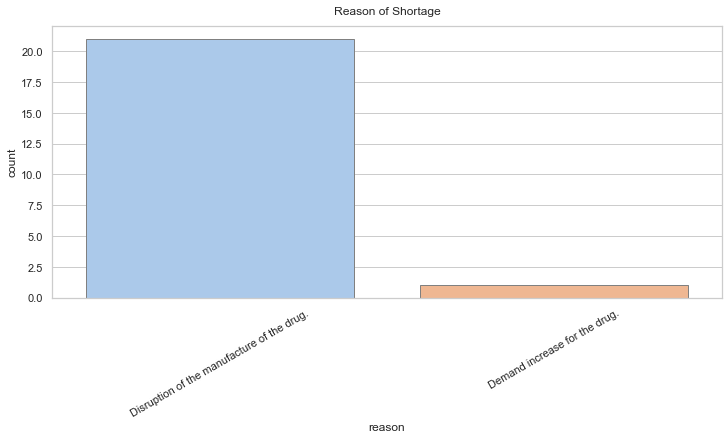

In [117]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid")
plt.title("Reason of Shortage", y=1.02);

# sequential_colors = sns.color_palette("Blues")
plt.xticks(rotation=30)
sns.countplot(x=df2['reason'], palette='pastel', edgecolor=".5")

Check how many differents drugs formats under "Common Name"

<AxesSubplot:title={'center':"Count of DIN from drug 'Common Name'"}, xlabel='drug_identification_number', ylabel='count'>

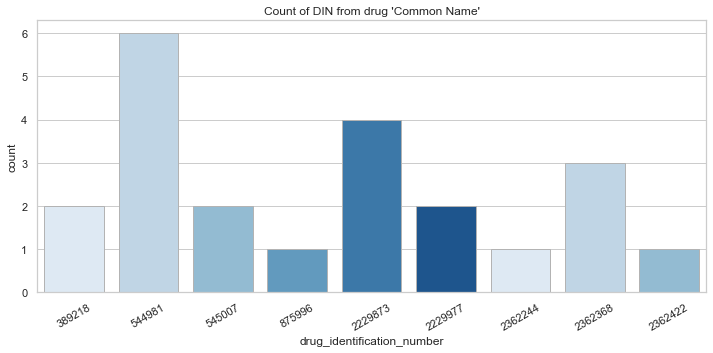

In [118]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid")
plt.title("Count of DIN from drug 'Common Name'");

sequential_colors = sns.color_palette("Blues",6)
plt.xticks(rotation=30)
sns.countplot(x=df2['drug_identification_number'], palette=sequential_colors, edgecolor=".7")

In [119]:
# filtering columns
col_list = ['actual_start_date', 'actual_end_date']
df2 = df2[col_list]                                                                                             

In [120]:
# loading timeseries from 2017-01-01, getting number of days
today = datetime.date.today()
start = datetime.date(2017,1,1)
diff = (today - start).days
diff

2297

In [121]:
# ---- Create day index
temp_day = datetime.date(2017,1,1)
index = [(temp_day + datetime.timedelta(days=d)) for d in range(diff)]

In [122]:
# ---- Create empty result df
# initialize df, set days as datetime in index
d = pd.DataFrame(np.zeros((diff,1)),
                 index=pd.to_datetime(index),
                 columns=['shortage_day'])

# ---- Iterate over df to fill d (final df)
for i, row in df2.iterrows():

    # 1 if some visitor in df.start, df.end
    d.loc[row.actual_start_date:row.actual_end_date,'shortage_day'] = 1




In [123]:
# print(d.loc['2017-03-05':'2017-03-20'])

In [124]:
d=d.reset_index()
d['index'] = d['index'].astype('datetime64[D]')

In [125]:
d.dtypes

index           datetime64[ns]
shortage_day           float64
dtype: object

In [126]:
# Get Date into months and years
d['Date'] = d.index
d['Year'] = d['index'].dt.year
d['Month'] = d['index'].dt.month

In [127]:
d.head()

,index,shortage_day,Date,Year,Month
0,2017-01-01,0.0,0,2017,1
1,2017-01-02,0.0,1,2017,1
2,2017-01-03,0.0,2,2017,1
3,2017-01-04,0.0,3,2017,1
4,2017-01-05,0.0,4,2017,1


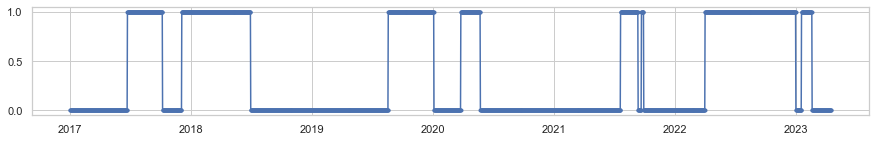

In [129]:
sns.set(rc={'figure.figsize':(15,2)})
sns.set_theme(style="whitegrid")

#plt.xticks(rotation=30)
plt.plot(d["index"], d["shortage_day"],linestyle='-', marker='.')
plt.show()